In [7]:
library(plyr)
library(arulesViz)     #visualizing Association Rules and Frequent Itemsets
library(arulesViz)  #Mining Association Rules and Frequent Itemsets

Warning message:
"package 'plyr' was built under R version 3.6.3"Warning message:
"package 'arulesViz' was built under R version 3.6.3"Loading required package: arules
Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"
Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [8]:
install.packages('httr')
if (!file.exists("titanic.raw.rdata")) {
 library(httr)
 resp <- GET("http://www.rdatamining.com/data/titanic.raw.rdata")
 writeBin(content(resp, 'raw'), "titanic.raw.rdata")
}
a=load("titanic.raw.rdata")

Warning message:
"package 'httr' is in use and will not be installed"

In [9]:
titanic_r = titanic.raw #creating the dataset

In [59]:
write.csv(titanic_r, file = 'Titanic-AssociationRules.csv', quote = FALSE, row.names = TRUE)

In [10]:
head(titanic_r )   #6 first rows

Class,Sex,Age,Survived
3rd,Male,Child,No
3rd,Male,Child,No
3rd,Male,Child,No
3rd,Male,Child,No
3rd,Male,Child,No
3rd,Male,Child,No


In [19]:
tail(titanic_r)   #6 last rows

,Class,Sex,Age,Survived
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes
2200,Crew,Female,Adult,Yes
2201,Crew,Female,Adult,Yes


In [14]:
dim(titanic_r)  #dimension of dataset

[1] 2201    4

In [23]:
str(titanic_r)  #general information of the dataset

'data.frame':	2201 obs. of  4 variables:
 $ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex     : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age     : Factor w/ 2 levels "Adult","Child": 2 2 2 2 2 2 2 2 2 2 ...
 $ Survived: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


In [22]:
summary(titanic_r)  #statistical summary of the dataset

  Class         Sex          Age       Survived  
 1st :325   Female: 470   Adult:2092   No :1490  
 2nd :285   Male  :1731   Child: 109   Yes: 711  
 3rd :706                                        
 Crew:885                                        

In [21]:
table(titanic_r$Age,titanic_r$Survived)   #frequency table of two age and survived columns

       
          No  Yes
  Adult 1438  654
  Child   52   57

In [41]:
table(titanic_r$Age,titanic_r$Sex)   #frequency table of two age and sex columns

       
        Female Male
  Adult    425 1667
  Child     45   64

In [24]:
#frequency table of all variables
source("http://pcwww.liv.ac.uk/~william/R/crosstab.r")
freq_table=crosstab(titanic_r, row.vars = c("Class", "Sex","Age"), col.vars = "Survived", type = "f")
freq_table

                   Survived   No  Yes  Sum
Class Sex    Age                          
1st   Female Adult             4  140  144
             Child             0    1    1
             Sum               4  141  145
      Male   Adult           118   57  175
             Child             0    5    5
             Sum             118   62  180
      Sum    Adult           122  197  319
             Child             0    6    6
             Sum             122  203  325
2nd   Female Adult            13   80   93
             Child             0   13   13
             Sum              13   93  106
      Male   Adult           154   14  168
             Child             0   11   11
             Sum             154   25  179
      Sum    Adult           167   94  261
             Child             0   24   24
             Sum             167  118  285
3rd   Female Adult            89   76  165
             Child            17   14   31
             Sum             106   90  196
      Male 

In [46]:
#Apriori algorithm Implementation for titanic dataset, excluding class column
rule=apriori(titanic_r[2:4], parameter=list(minlen=2, supp=0.001, conf=0.05),  
                appearance = list(default = "lhs", rhs=c("Survived=Yes","Survived=No")))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[6 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [49]:
summary(rule)

set of 16 rules

rule length distribution (lhs + rhs):sizes
2 3 
8 8 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     2.0     2.5     2.5     3.0     3.0 

summary of quality measures:
    support           confidence        coverage            lift       
 Min.   :0.007724   Min.   :0.2028   Min.   :0.02045   Min.   :0.3789  
 1st Qu.:0.021695   1st Qu.:0.3015   1st Qu.:0.04441   1st Qu.:0.6492  
 Median :0.100409   Median :0.5000   Median :0.20332   Median :0.9916  
 Mean   :0.187500   Mean   :0.5000   Mean   :0.37500   Mean   :1.1231  
 3rd Qu.:0.199341   3rd Qu.:0.6985   3rd Qu.:0.76465   3rd Qu.:1.4567  
 Max.   :0.653339   Max.   :0.7972   Max.   :0.95048   Max.   :2.3017  
     count        
 Min.   :  17.00  
 1st Qu.:  47.75  
 Median : 221.00  
 Mean   : 412.69  
 3rd Qu.: 438.75  
 Max.   :1438.00  

mining info:
           data ntransactions support confidence
 titanic_r[2:4]          2201   0.001       0.05

In [50]:
#Display the top 20 rules with the highest lift 
inspect(sort(rule,by="lift"))

     lhs                       rhs            support     confidence coverage  
[1]  {Sex=Female,Age=Adult} => {Survived=Yes} 0.143571104 0.7435294  0.19309405
[2]  {Sex=Female}           => {Survived=Yes} 0.156292594 0.7319149  0.21353930
[3]  {Sex=Female,Age=Child} => {Survived=Yes} 0.012721490 0.6222222  0.02044525
[4]  {Age=Child}            => {Survived=Yes} 0.025897319 0.5229358  0.04952294
[5]  {Sex=Male,Age=Child}   => {Survived=Yes} 0.013175829 0.4531250  0.02907769
[6]  {Sex=Male,Age=Adult}   => {Survived=No}  0.603816447 0.7972406  0.75738301
[7]  {Sex=Male}             => {Survived=No}  0.619718310 0.7879838  0.78646070
[8]  {Age=Adult}            => {Survived=No}  0.653339391 0.6873805  0.95047706
[9]  {Age=Adult}            => {Survived=Yes} 0.297137665 0.3126195  0.95047706
[10] {Sex=Male,Age=Child}   => {Survived=No}  0.015901863 0.5468750  0.02907769
[11] {Age=Child}            => {Survived=No}  0.023625625 0.4770642  0.04952294
[12] {Sex=Male}             => {Survived

as is shown in the result, women (either adults or children) has the highest probability of being survived, followed by child males. 
in the contary, male adults had the highest probability of not being survived. 

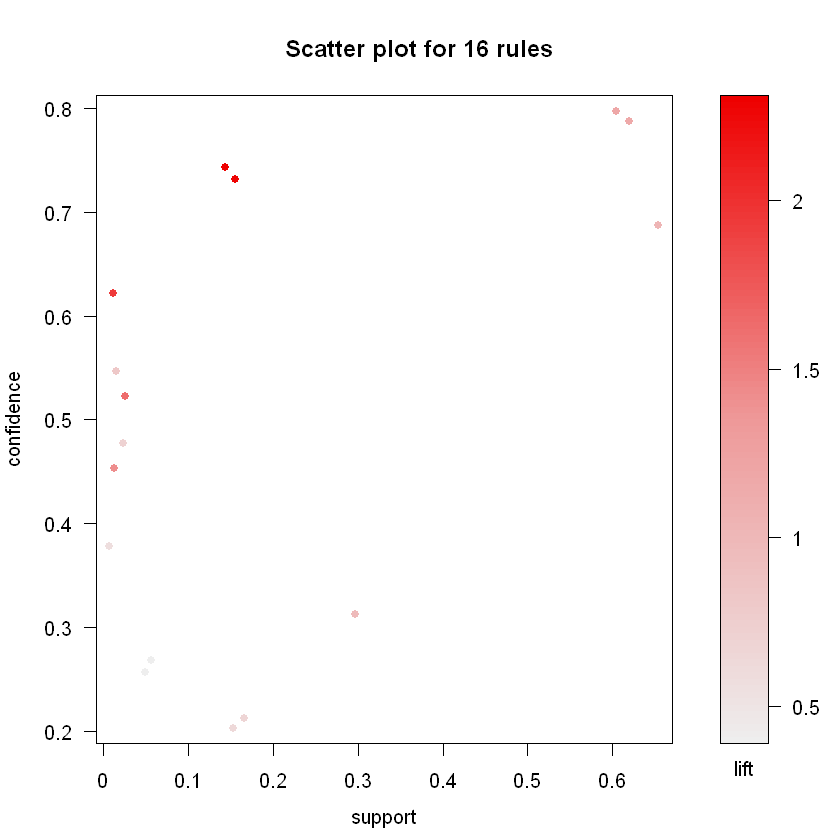

In [51]:
# Displays scatterplot
plot(rule, method="scatterplot", jitter = 0)

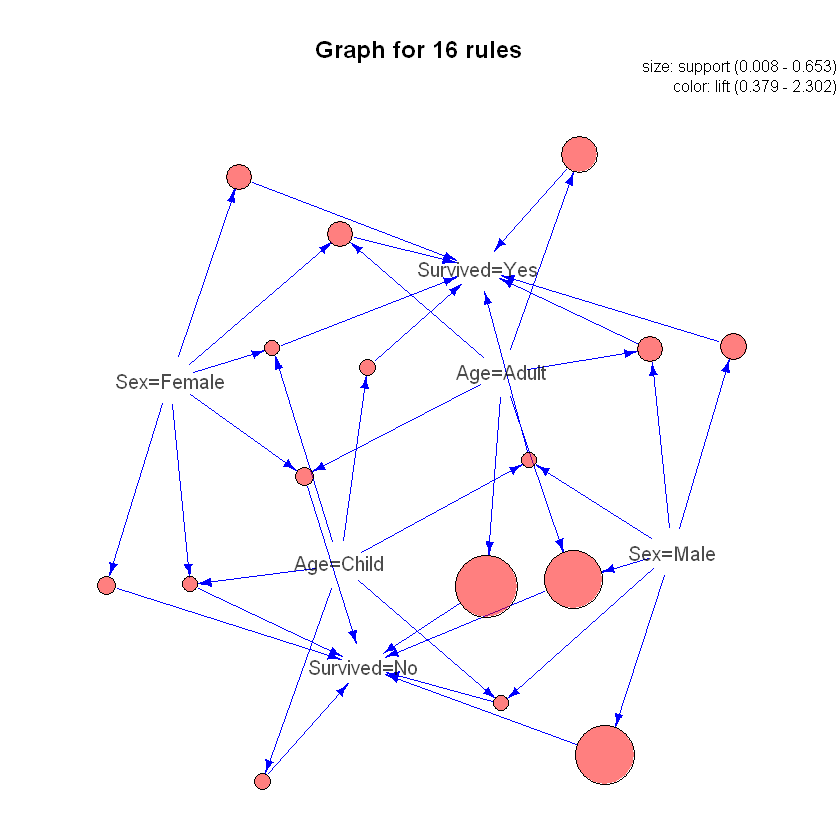

In [54]:
#Visualizing rules
plot(sort(rule,by="lift"), method="graph", control=list(nodeCol="red", edgeCol="blue"))

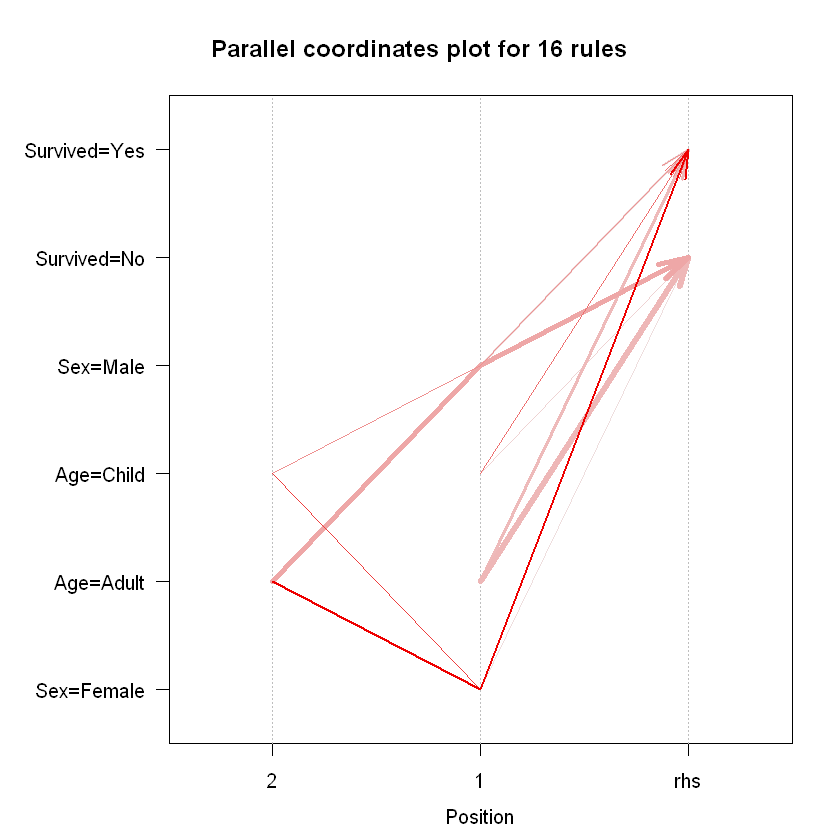

In [55]:
#Visualizing the top 20 rules with the highest lift
plot(sort(rule,by="lift"), method="paracoord")

following, we add the class column to the model

In [56]:
#Apriori algorithm Implementation 
rule=apriori(titanic_r, parameter=list(minlen=2, supp=0.001, conf=0.05),  
                appearance = list(default = "lhs", rhs=c("Survived=Yes","Survived=No")))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [73 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [57]:
#Display the top 20 rules with the highest lift 
inspect(sort(rule,by="lift"))

     lhs                                  rhs            support     confidence
[1]  {Class=2nd,Age=Child}             => {Survived=Yes} 0.010904134 1.00000000
[2]  {Class=1st,Age=Child}             => {Survived=Yes} 0.002726034 1.00000000
[3]  {Class=2nd,Sex=Female,Age=Child}  => {Survived=Yes} 0.005906406 1.00000000
[4]  {Class=2nd,Sex=Male,Age=Child}    => {Survived=Yes} 0.004997728 1.00000000
[5]  {Class=1st,Sex=Male,Age=Child}    => {Survived=Yes} 0.002271695 1.00000000
[6]  {Class=1st,Sex=Female}            => {Survived=Yes} 0.064061790 0.97241379
[7]  {Class=1st,Sex=Female,Age=Adult}  => {Survived=Yes} 0.063607451 0.97222222
[8]  {Class=2nd,Sex=Female}            => {Survived=Yes} 0.042253521 0.87735849
[9]  {Class=Crew,Sex=Female}           => {Survived=Yes} 0.009086779 0.86956522
[10] {Class=Crew,Sex=Female,Age=Adult} => {Survived=Yes} 0.009086779 0.86956522
[11] {Class=2nd,Sex=Female,Age=Adult}  => {Survived=Yes} 0.036347115 0.86021505
[12] {Sex=Female,Age=Adult}            =

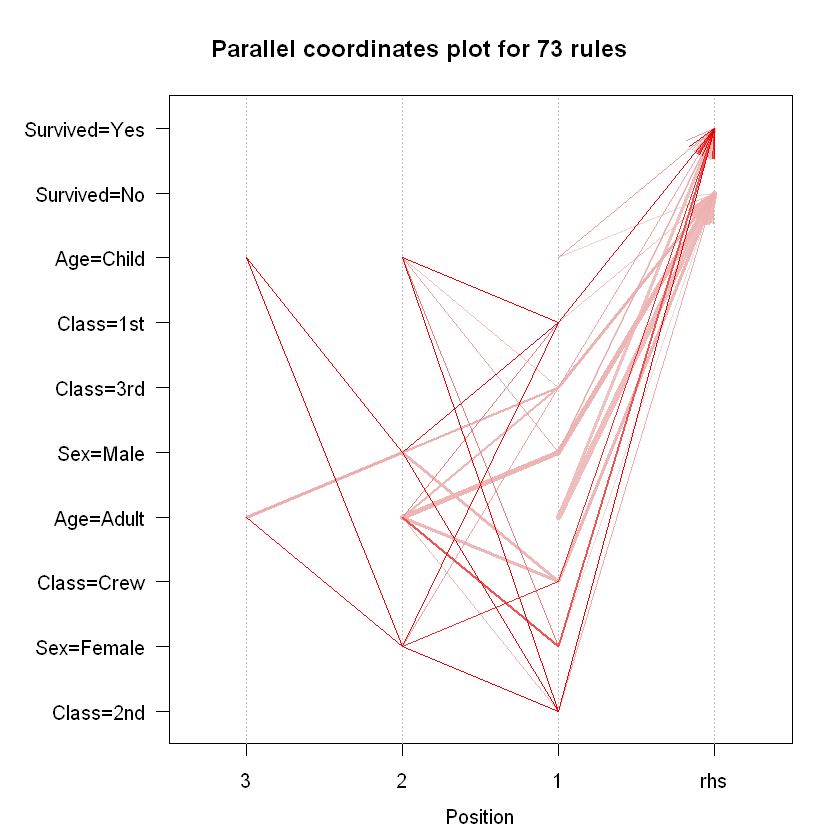

In [58]:
#Visualizing the top 20 rules with the highest lift
plot(sort(rule,by="lift"), method="paracoord")